In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Loading Dataset and Inspection

In [66]:
df = pd.read_csv('Position_Salaries.csv')

In [75]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [76]:
df.shape

(10, 3)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


# EDA

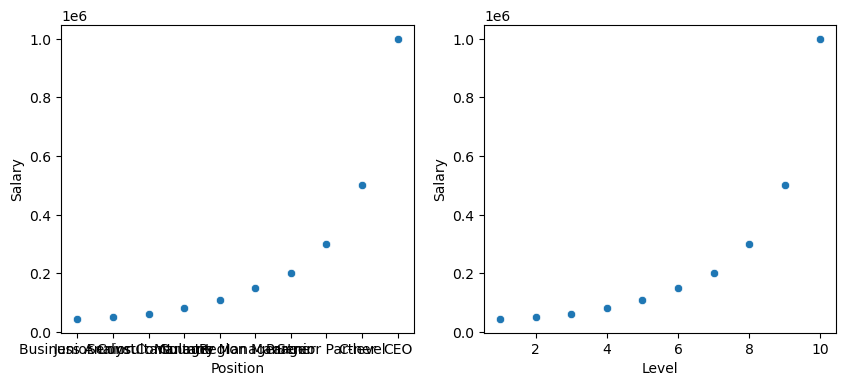

In [83]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Position', y='Salary')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Level', y='Salary')
plt.show()

# Encoding

In [84]:
le = LabelEncoder()
df['Position'] = le.fit_transform(df['Position'])
df

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


# Model Building

In [90]:
X = df.drop(['Position', 'Salary'], axis=1)
y = df['Salary']

In [91]:
# Training the Linear Regression model on the whole dataset
lin_reg = LinearRegression()
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
# Training the Polynomial Regression model on the whole dataset
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


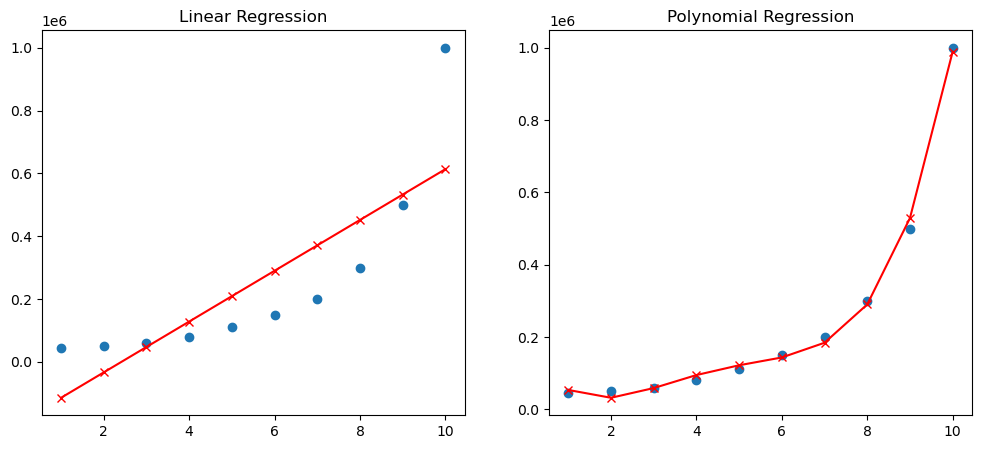

In [94]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), color='r', marker='x')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(X, y)
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='r', marker='x')
plt.title('Polynomial Regression')
plt.show()

# Testing

In [99]:
test_sample = pd.DataFrame({
    'Level': [6.5]
})
test_sample

,Level
0,6.5


In [100]:
# LR prediction
print(f'Predicted Salary: {lin_reg.predict(test_sample)[0]}')

Predicted Salary: 330378.78787878784


In [101]:
# Polynomial Regression prediction
print(f'Predicted Salary: {lin_reg_2.predict(poly_reg.fit_transform(test_sample))[0]}')

Predicted Salary: 158862.45265157335


# Training Score

In [102]:
# Linear Regression
lin_reg.score(X, y)

0.6690412331929895

In [103]:
# Polynomial Regression
lin_reg_2.score(poly_reg.fit_transform(X), y)

0.9973922891706614